# Simple Logistic Regression Model

## Setup

In [1]:
# Libraries.

import matplotlib, matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import pymc

In [15]:
# Settings.

% %matplotlib inline

In [ ]:
# Constants.



## Data

In [3]:
# Read games.
games = pd.read_csv('../../../data/games.csv')
# Trim to single group.
games = games[games.game_group == 1]

# Store single year.
games_2014 = games[games.year == 2014]

In [12]:
games_2014.head()

,game_id,game_group,year,date,team,opponent,conference,conference_tournament,ncaa_tournament,other_tournament,...,opponent_RankAdjOE,opponent_DE,opponent_RankDE,opponent_AdjDE,opponent_RankAdjDE,opponent_Pythag,opponent_RankPythag,points_for,points_against,win
43277,20131108-airforce-army,1,2014,2013-11-08,Air Force,Army,0,0,0,0,...,175,107.6478,246,110.3330,280,0.341580,238,79,68,1
43278,20131108-akron-coastalcarolina,1,2014,2013-11-08,Akron,Coastal Carolina,0,0,0,0,...,283,100.3050,74,102.3126,113,0.379442,213,72,63,1
43281,20131108-alabama-oklahoma,1,2014,2013-11-08,Alabama,Oklahoma,0,0,0,0,...,16,104.7806,170,100.5905,91,0.841570,33,73,82,0
43283,20131108-alabamast-illinois,1,2014,2013-11-08,Alabama St.,Illinois,0,0,0,0,...,177,98.4731,47,93.2777,11,0.778579,49,63,80,0
43284,20131108-albany-siena,1,2014,2013-11-08,Siena,Albany,0,0,0,0,...,218,100.4291,79,103.0624,129,0.469798,173,62,74,0


In [7]:
# Define our data.
x = np.array(games_2014.team_Pythag)
y = np.array(games_2014.win)

# Define our priors. PyMC uses precision (inverse variance).
b0 = pymc.Normal('b0', 0, 0.0003)
b1 = pymc.Normal('b1', 0, 0.0003)

# Error distribution.
err = pymc.Bernoulli('err', .5)

# Logistic function.
@pymc.deterministic
def logistic(b0=b0, b1=b1, x=x):
    return 1.0 / (1. + np.exp(-(b0 + b1 * x)))

# Create data in PyMC way.
x_pymc = pymc.Normal('team_Pythag', 0, 1, value=x, observed=True)
y_pymc = pymc.Bernoulli('win', logistic, value=y, observed=True)

# Model
model = pymc.Model([logistic, b0, b1, y_pymc, err, x_pymc])

In [12]:
# Prepare for MCMC.
mcmc = pymc.MCMC(model)

# Sample!
mcmc.sample(10000, 2000)

 [-----------------100%-----------------] 10000 of 10000 complete in 6.3 sec

In [13]:
print mcmc.trace('b0')[:].mean()
print mcmc.trace('b1')[:].mean()

-1.41652206179
2.79229389247


(array([   36.,   320.,   956.,  2075.,  2069.,  1634.,   533.,   223.,
          111.,    43.]),
 array([-1.6296561 , -1.581005  , -1.5323539 , -1.4837028 , -1.43505171,
        -1.38640061, -1.33774951, -1.28909842, -1.24044732, -1.19179622,
        -1.14314513]),
 <a list of 10 Patch objects>)

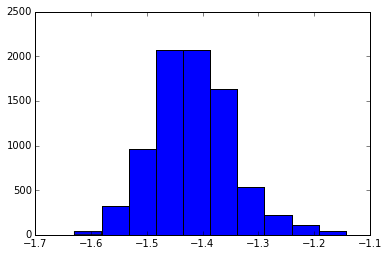

In [16]:
plt.hist(mcmc.trace('b0')[:])

(array([   16.,    85.,   206.,   859.,  1737.,  2332.,  1847.,   774.,
          132.,    12.]),
 array([ 2.25980265,  2.35791958,  2.45603652,  2.55415345,  2.65227038,
         2.75038732,  2.84850425,  2.94662118,  3.04473812,  3.14285505,
         3.24097198]),
 <a list of 10 Patch objects>)

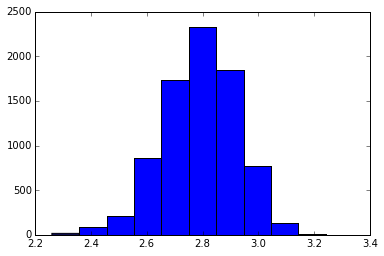

In [17]:
plt.hist(mcmc.trace('b1')[:])